<a href="https://colab.research.google.com/github/ichrafmoula/IMDB-Movies-Sentiment-Analysis-using-BERT/blob/master/Sentiment_Classification_Using_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# install ktrain on Google Colab
!pip3 install ktrain

     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 981 kB 61.1 MB/s 
     |████████████████████████████████| 263 kB 68.5 MB/s 
     |████████████████████████████████| 2.8 MB 53.0 MB/s 
     |████████████████████████████████| 1.2 MB 58.2 MB/s 
     |████████████████████████████████| 468 kB 47.0 MB/s 
     |████████████████████████████████| 596 kB 54.7 MB/s 
     |████████████████████████████████| 895 kB 55.9 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 
     |████████████████████████████████| 3.3 MB 46.0 MB/s 
  Created wheel for ktrain: filename=ktrain-0.29.2-py3-none-any.whl size=25294171 sha256=0726af2bcc82e880fea604020666b8e39598019ee8500a5a571615161b044ada
  Stored in directory: /root/.cache/pip/wheels/db/b1/ad/94fe0ceeaa8ed0319e74773cba99b6aa6192998b1035adc295
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9931 sha256=b2b0fc60d9012eec

In [ ]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

**1. Import Data**

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/PFE_2021/rapport/data_train.csv', encoding='utf-8')
data_test = pd.read_csv('/content/drive/MyDrive/PFE_2021/rapport/data_test.csv', encoding='utf-8')

X_train = data_train.Text.tolist()
X_test = data_test.Text.tolist()

y_train = data_train.Emotion.tolist()
y_test = data_test.Emotion.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

print('size of training set: %s' % (len(data_train['Text'])))
print('size of validation set: %s' % (len(data_test['Text'])))
print(data.Emotion.value_counts())

data.head(10)

size of training set: 7934
size of validation set: 3393
joy        2326
sadness    2317
anger      2259
neutral    2254
fear       2171
Name: Emotion, dtype: int64


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...
5,sadness,When my family heard that my Mother's cousin w...
6,joy,Finding out I am chosen to collect norms for C...
7,anger,A spokesperson said : ` Glen is furious that t...
8,neutral,Yes .
9,sadness,"When I see people with burns I feel sad, actua..."


In [ ]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'neutral': 4
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

**Data preprocessing**

In [ ]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


**Training and validation**

In [ ]:
from keras import metrics

In [ ]:
model = text.text_classifier('bert', 
                             train_data=(x_train, y_train), 
                             metrics=['accuracy', metrics.Recall(),metrics.Precision()],
                             preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 350)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 350)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 350, 768),  23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 350, 768)     1536        ['Input-Segment[0][0]']    

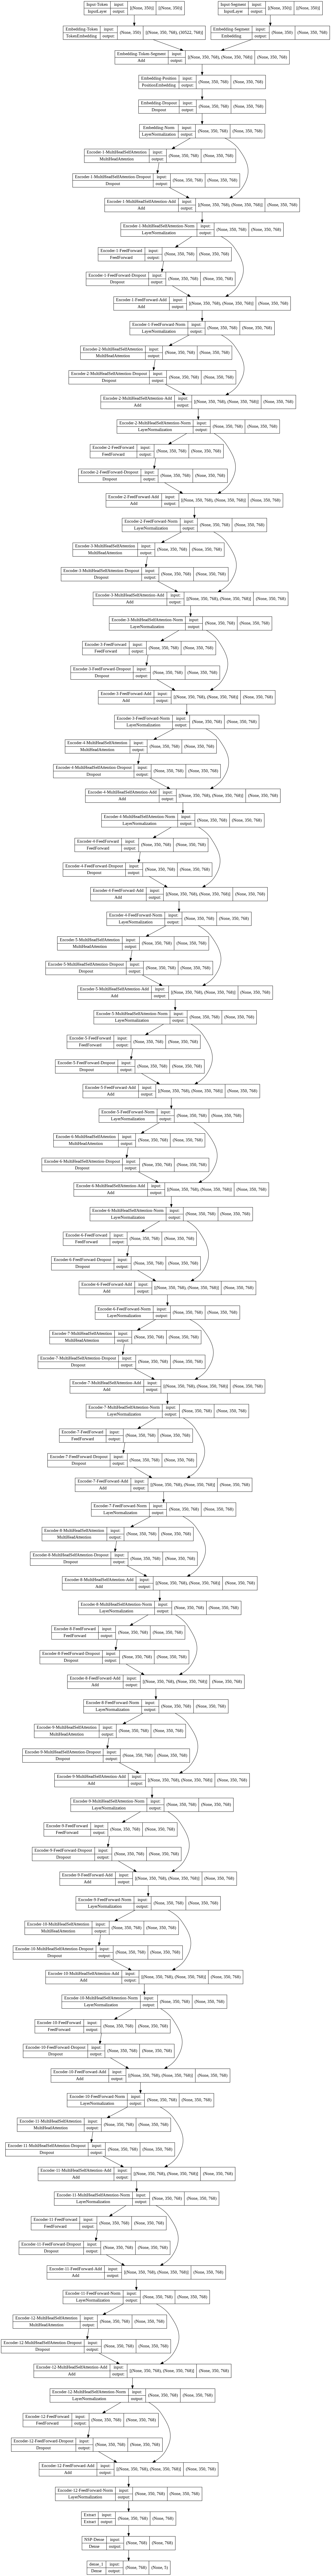

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_bert.png', show_shapes=True, show_layer_names=True)


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [ ]:
#learner.lr_find(show_plot=True , max_epochs=2)

In [ ]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
1323/1323 [==============================] - 823s 604ms/step - loss: 0.9375 - accuracy: 0.6385 - recall: 0.4703 - precision: 0.8186 - val_loss: 0.5955 - val_accuracy: 0.7798 - val_recall: 0.7574 - val_precision: 0.8130
Epoch 2/4
1323/1323 [==============================] - 796s 602ms/step - loss: 0.4647 - accuracy: 0.8418 - recall: 0.8161 - precision: 0.8690 - val_loss: 0.5690 - val_accuracy: 0.8034 - val_recall: 0.7831 - val_precision: 0.8264
Epoch 3/4
1323/1323 [==============================] - 796s 602ms/step - loss: 0.2525 - accuracy: 0.9182 - recall: 0.9084 - precision: 0.9293 - val_loss: 0.5974 - val_accuracy: 0.8190 - val_recall: 0.8102 - val_precision: 0.8343
Epoch 4/4
1323/1323 [==============================] - 796s 602ms/step - loss: 0.0910 - accuracy: 0.9752 - recall: 0.9730 - precision: 0.9771 - val_loss: 0.6558 - val_accuracy: 0.8205 - val_recall: 0.8143 - val_precision: 0.8282


In [ ]:
learner.validate(val_data=(x_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       707
           1       0.80      0.80      0.80       676
           2       0.86      0.85      0.85       679
           3       0.78      0.78      0.78       693
           4       0.79      0.84      0.82       638

    accuracy                           0.82      3393
   macro avg       0.82      0.82      0.82      3393
weighted avg       0.82      0.82      0.82      3393



array([[585,  17,  17,  19,  69],
       [ 15, 541,  37,  61,  22],
       [ 18,  23, 576,  42,  20],
       [ 18,  65,  33, 544,  33],
       [ 35,  29,   7,  29, 538]])

In [ ]:
learner.evaluate()

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       707
           1       0.80      0.80      0.80       676
           2       0.86      0.85      0.85       679
           3       0.78      0.78      0.78       693
           4       0.79      0.84      0.82       638

    accuracy                           0.82      3393
   macro avg       0.82      0.82      0.82      3393
weighted avg       0.82      0.82      0.82      3393



array([[585,  17,  17,  19,  69],
       [ 15, 541,  37,  61,  22],
       [ 18,  23, 576,  42,  20],
       [ 18,  65,  33, 544,  33],
       [ 35,  29,   7,  29, 538]])

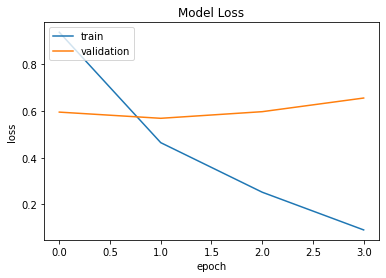

In [ ]:
learner.plot()

In [ ]:
learner.validate(val_data=(x_train, y_train), class_names=class_names)

              precision    recall  f1-score   support

         joy       1.00      0.99      0.99      1619
     sadness       0.99      0.99      0.99      1641
        fear       1.00      0.99      0.99      1492
       anger       1.00      0.99      0.99      1566
     neutral       0.97      0.99      0.98      1616

    accuracy                           0.99      7934
   macro avg       0.99      0.99      0.99      7934
weighted avg       0.99      0.99      0.99      7934



array([[1596,    0,    0,    0,   23],
       [   0, 1620,    5,    4,   12],
       [   4,    5, 1481,    0,    2],
       [   2,    6,    0, 1551,    7],
       [   2,    6,    1,    2, 1605]])

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

         joy       0.87      0.83      0.85       707
     sadness       0.80      0.80      0.80       676
        fear       0.86      0.85      0.85       679
       anger       0.78      0.78      0.78       693
     neutral       0.79      0.84      0.82       638

    accuracy                           0.82      3393
   macro avg       0.82      0.82      0.82      3393
weighted avg       0.82      0.82      0.82      3393



array([[585,  17,  17,  19,  69],
       [ 15, 541,  37,  61,  22],
       [ 18,  23, 576,  42,  20],
       [ 18,  65,  33, 544,  33],
       [ 35,  29,   7,  29, 538]])

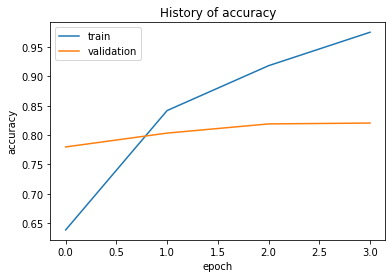

In [ ]:

learner.plot('accuracy')

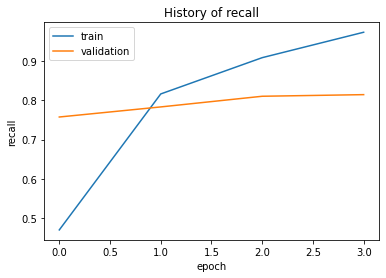

In [ ]:
learner.plot('recall')

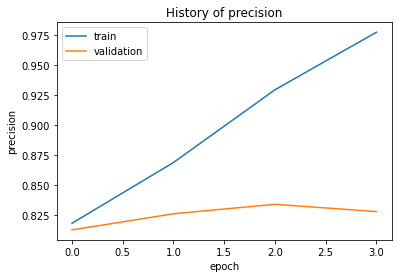

In [ ]:
learner.plot('precision')

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)


['joy', 'sadness', 'fear', 'anger', 'neutral']

In [ ]:
predictor.get_classes()

In [9]:
message=""" Of course Nutella tastes great, but when you read the ingredients and take a look at where they come from,
it is frightening. The main ingredient is palm oil, which not only is really bad for your health, but is killing rain 
forests in Asia and causing the orang-oetangs to go extinct."""
prediction = predictor.predict(message)
prediction

'fear'

In [ ]:
predictor.save("/content/drive/MyDrive/PFE_2021/rapport/bert")

In [7]:
import ktrain
predictor = ktrain.load_predictor('/content/drive/MyDrive/PFE_2021/rapport/bert')
message=""" Of course Nutella tastes great, but when you read the ingredients and take a look at where they come from,
it is frightening. The main ingredient is palm oil, which not only is really bad for your health, but is killing rain 
forests in Asia and causing the orang-oetangs to go extinct."""
prediction = predictor.predict(message)
prediction

'fear'